<a href="https://colab.research.google.com/github/arun1-singh/arun1-singh/blob/main/Copy_of_arunproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
#Importing Libraries and Datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style("darkgrid",{"grid.color": ".6", "grid.linestyle": ":"})


In [ ]:
#Understanding the dataset:
df.info

<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [ ]:

df.shape

(550, 7)

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [ ]:
#Numerical Data
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
#Categorical Data
df.describe(include="object").transpose()

,count,unique,top,freq
Name,550,351,Publication Manual of the American Psychologic...,10
Author,550,248,Jeff Kinney,12
Genre,550,2,Non Fiction,310


In [ ]:
#Null Values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
df["Reviews"].sum()

6574305

In [ ]:
print(df["Year"].unique())
print(df["Price"].describe().loc[["min","max"]])




[2016 2011 2018 2017 2019 2014 2010 2009 2015 2013 2012]
min      0.0
max    105.0
Name: Price, dtype: float64


In [ ]:
#Books with price >= 100 USD
df[df["Price"]>=100][["Name","Author", "Price"]].drop_duplicates()

,Name,Author,Price
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105


In [ ]:
#Books with price = 0 USD
df[df["Price"]==0][["Name","Author", "Price"]].drop_duplicates()

,Name,Author,Price
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,0
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,0
116,Frozen (Little Golden Book),RH Disney,0
193,JOURNEY TO THE ICE P,RH Disney,0
219,Little Blue Truck,Alice Schertle,0
358,The Constitution of the United States,Delegates of the Constitutional,0
381,The Getaway,Jeff Kinney,0
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,0
505,To Kill a Mockingbird,Harper Lee,0


In [ ]:
#What is the Genre wise split up ?
df["Genre"].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [ ]:
df["Genre"].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

Text(0, 0.5, 'Genre')

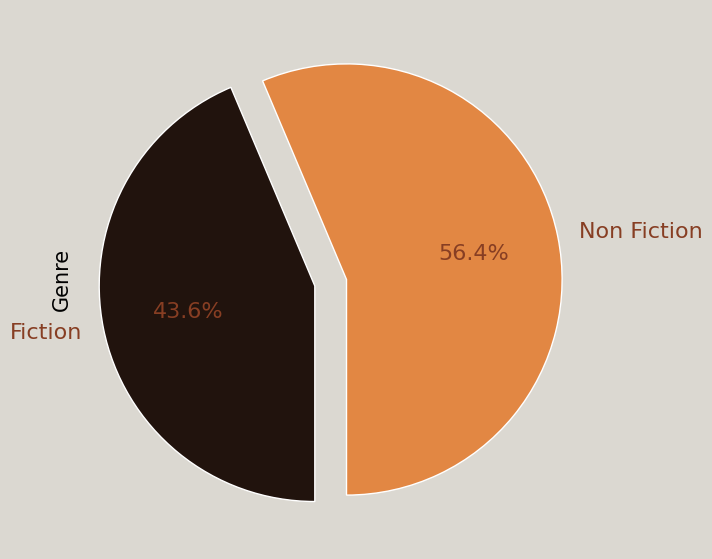

In [ ]:
plt.figure(figsize=(7,7), facecolor = "#dbd8d1")
(df["Genre"].value_counts()/len(df["Genre"]) *100).plot.pie(explode=(0, 0.15), colors =["#e28743","#21130d"],
                       startangle=270,autopct='%1.1f%%',textprops={'color':"#873e23"},fontsize=16)
plt.ylabel("Genre",color="black", fontsize=15)

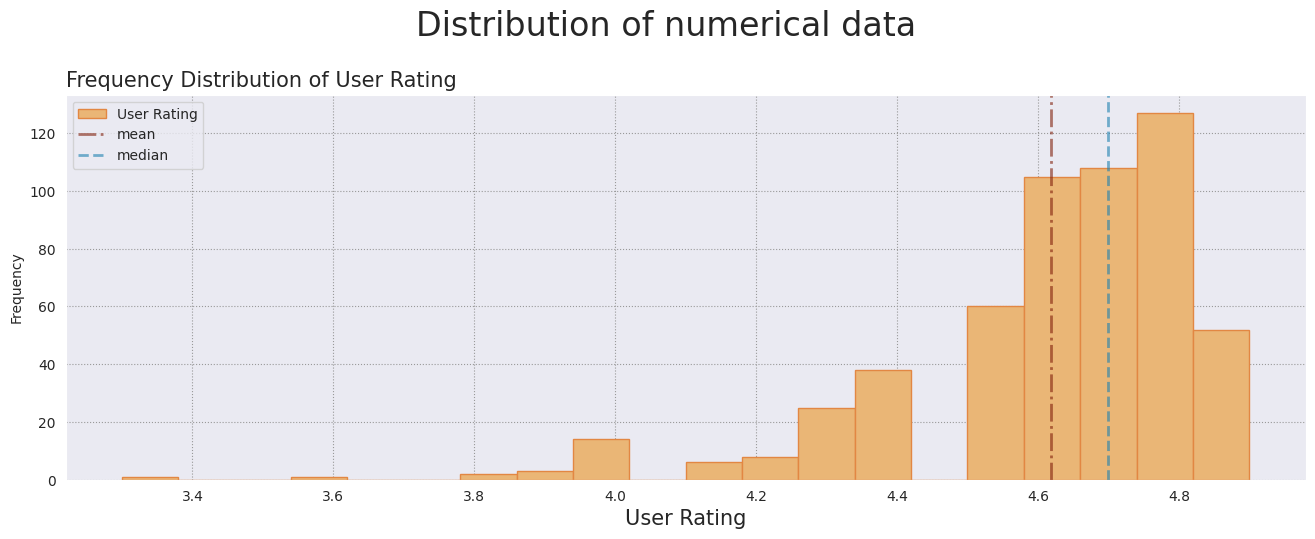

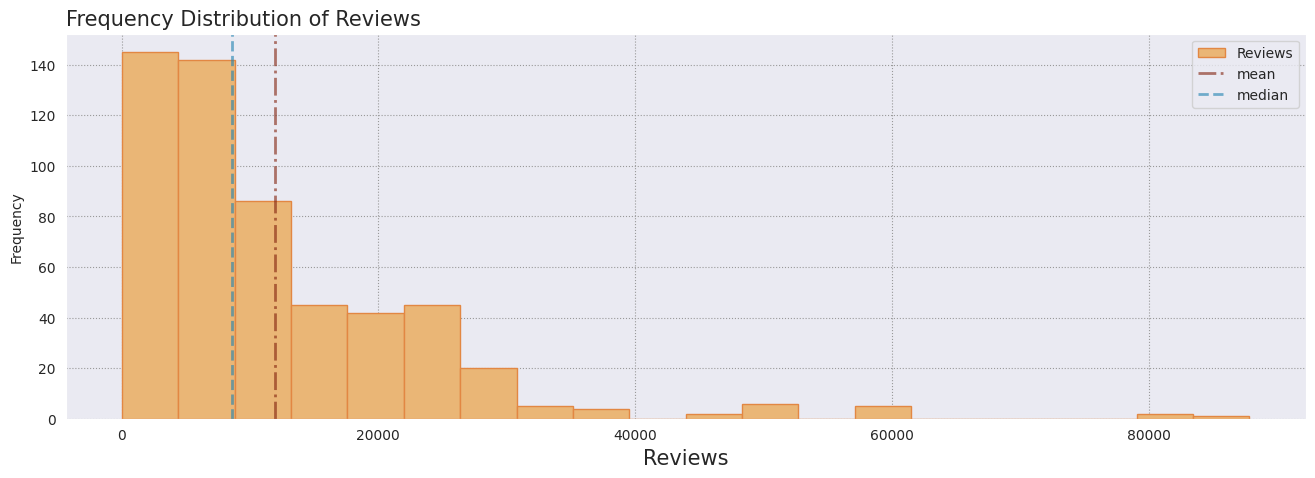

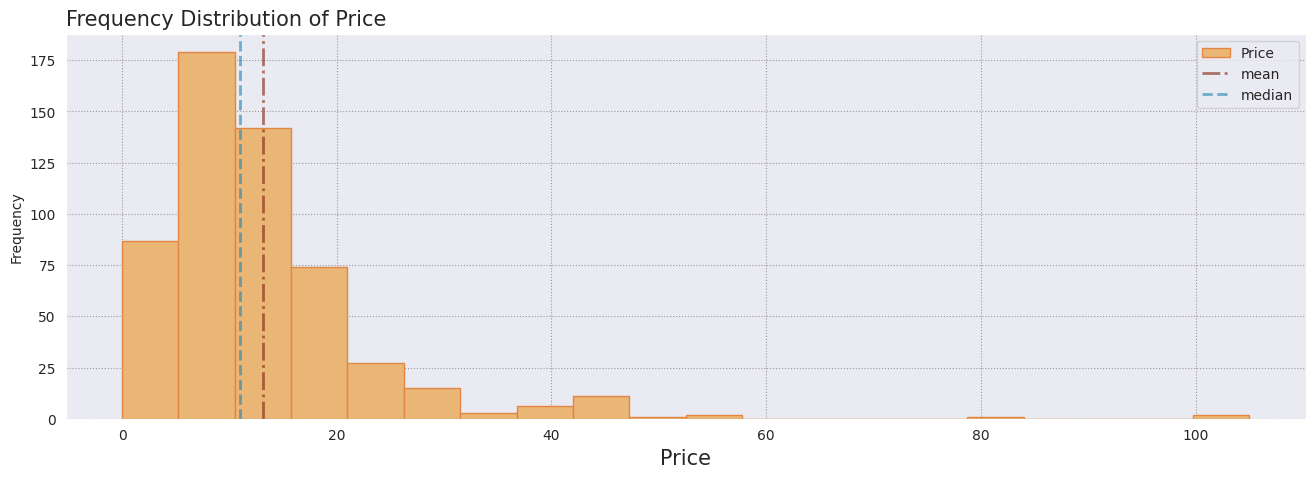

In [ ]:
#Numerical data distribution
plt.suptitle("Distribution of numerical data",fontsize =24,y=1.05)

for col in df.columns[2:5]:
    df[col].plot(kind ="hist", bins =20,figsize =(16,5), edgecolor ="#e28743",color ="#eab676")
    plt.axvline(df[col].mean(),c ="#81200c",ls= '-.',label ="mean",lw=2, alpha =0.6)
    plt.axvline(df[col].median(),c ="#1e81b0",ls= '--',label ="median",lw=2, alpha =0.6)
    plt.xlabel(col, fontsize = 15)
    plt.title("Frequency Distribution of "+ col, fontsize = 15, loc="left")
    plt.legend()
    plt.show()


In [ ]:
#Lowest Rated Book
lowest_rated = df[df["User Rating"]==df["User Rating"].min()]
lowest_rated

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [ ]:
#Highest Rated Book
highest_rated =df[df["User Rating"]==df["User Rating"].max()].drop_duplicates("Name")
highest_rated

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction


In [ ]:
#Maximum Reviews for a Book
df[df["Reviews"]==df["Reviews"].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [ ]:
#Minimum Reviews for a Book
df[df["Reviews"]==df["Reviews"].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction


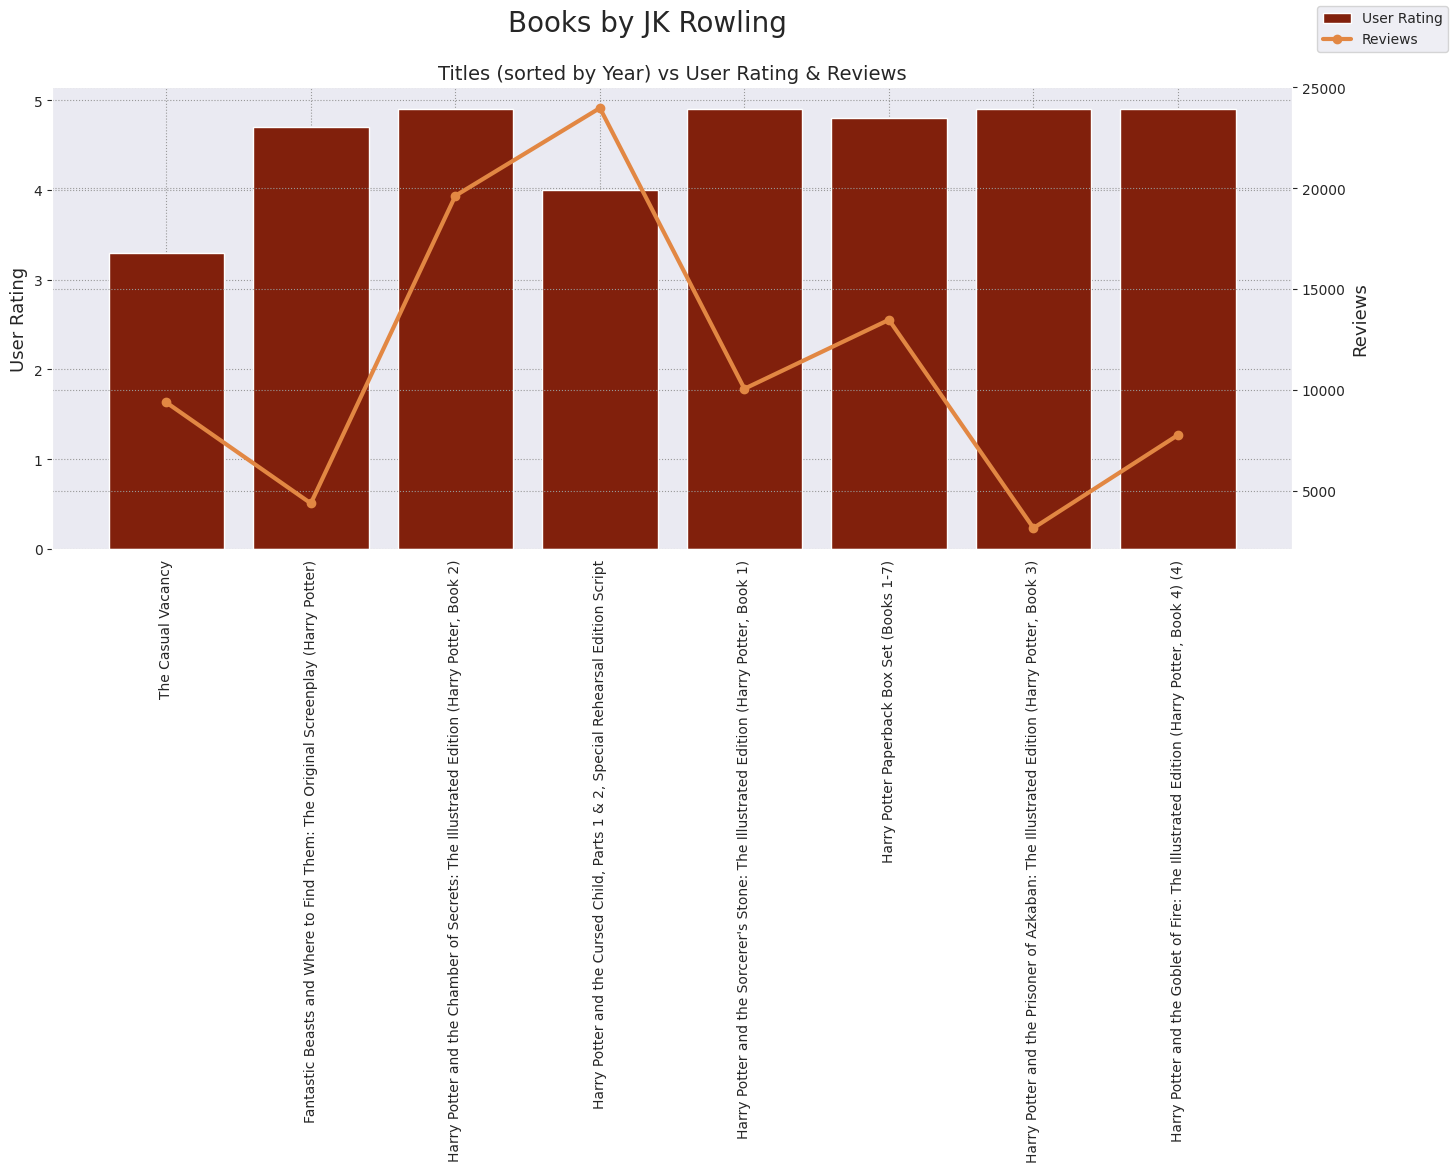

In [ ]:
#JK Rowling Over the years
jk_rowling = df[df["Author"].isin(["J.K. Rowling","J. K. Rowling"]) ]
jk_rowling = jk_rowling.sort_values(by="Year")

fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()
ax1.bar(jk_rowling["Name"],jk_rowling["User Rating"], color = "#81200c", label ="User Rating" )
ax1.set_ylabel("User Rating", fontsize =13)
ax1.tick_params(axis='x', labelrotation = 90)

ax2.plot(jk_rowling["Name"],jk_rowling["Reviews"],color = "#e28743",marker ="o",lw =3, label = "Reviews")
ax2.set_ylabel("Reviews", fontsize =13)

plt.suptitle("Books by JK Rowling ", fontsize =20,y =1.01)
plt.title("Titles (sorted by Year) vs User Rating & Reviews", fontsize =14)
fig.legend(loc="upper right")
fig.show()
jk_rowling

In [ ]:
#How has Average User Rating, Total Reviews and Average Price of books changed over the years?
df.groupby(["Year"]).agg({"User Rating":"mean","Reviews" :["sum"],"Price":["mean"]}).transpose()

,Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
User Rating,mean,4.584,4.558,4.558,4.532,4.554,4.622,4.648,4.678,4.66,4.668,4.74
Reviews,sum,235506.000,273981.000,405041.000,654546.000,654907.000,792997.000,711669.000,709800.000,644420.00,696521.000,794917.00
Price,mean,15.400,13.480,15.100,15.300,14.600,14.640,10.420,13.180,11.38,10.520,10.08


In [ ]:
lst =list((df["Year"].unique()))
lst.sort()
lst

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

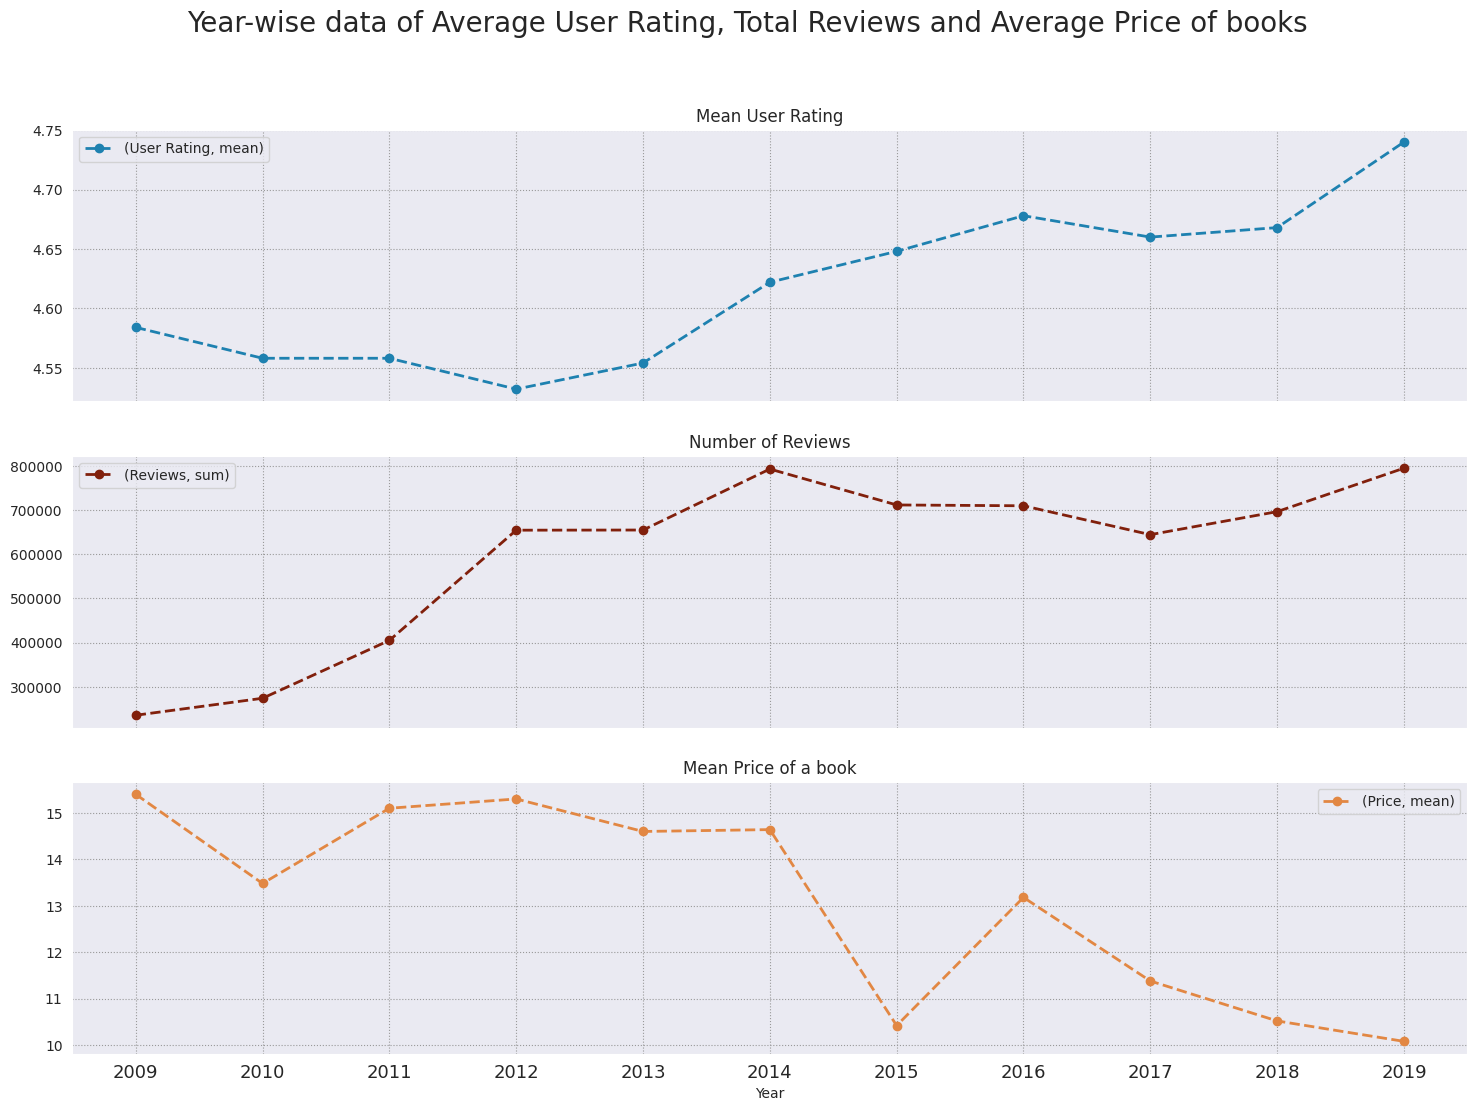

In [ ]:
df.groupby(["Year"]).agg({"User Rating":"mean","Reviews" :["sum"],"Price":["mean"]}).plot(subplots = True,                                                                                                                                                                                    figsize = (18,12), marker= "o",
                                                                                          ls = "--", lw =2,
                                                                                         color = ["#1e81b0","#81200c","#e28743"],
                                                                                         title=["Mean User Rating","Number of Reviews","Mean Price of a book"])

plt.suptitle("Year-wise data of Average User Rating, Total Reviews and Average Price of books", fontsize =20)
plt.xticks(lst,fontsize =13);

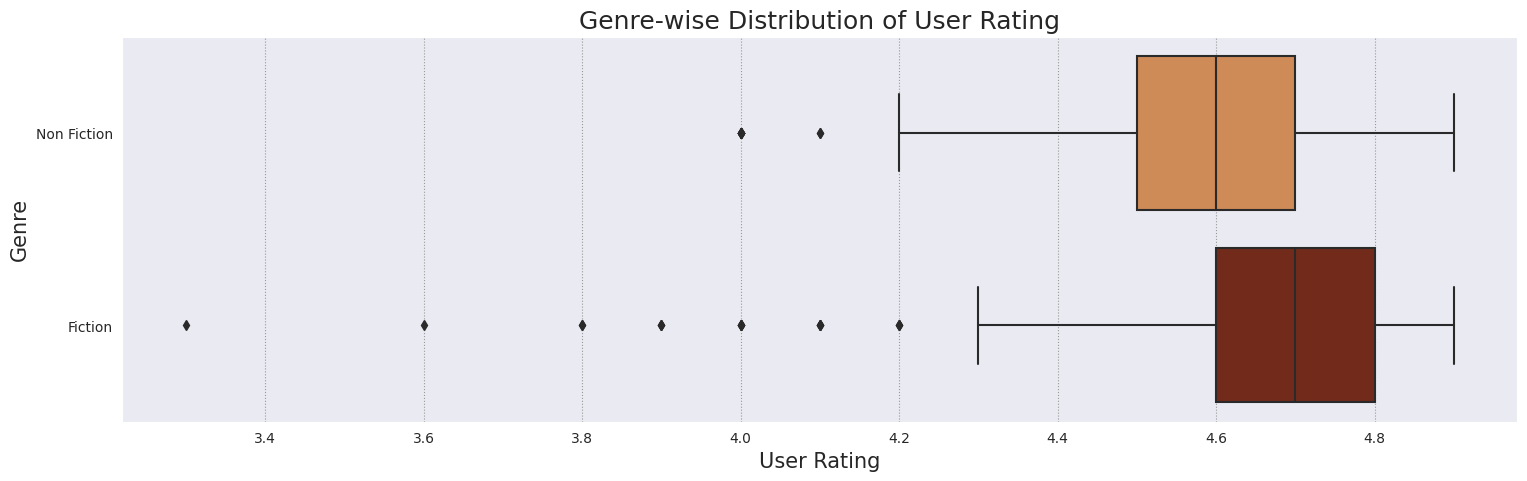

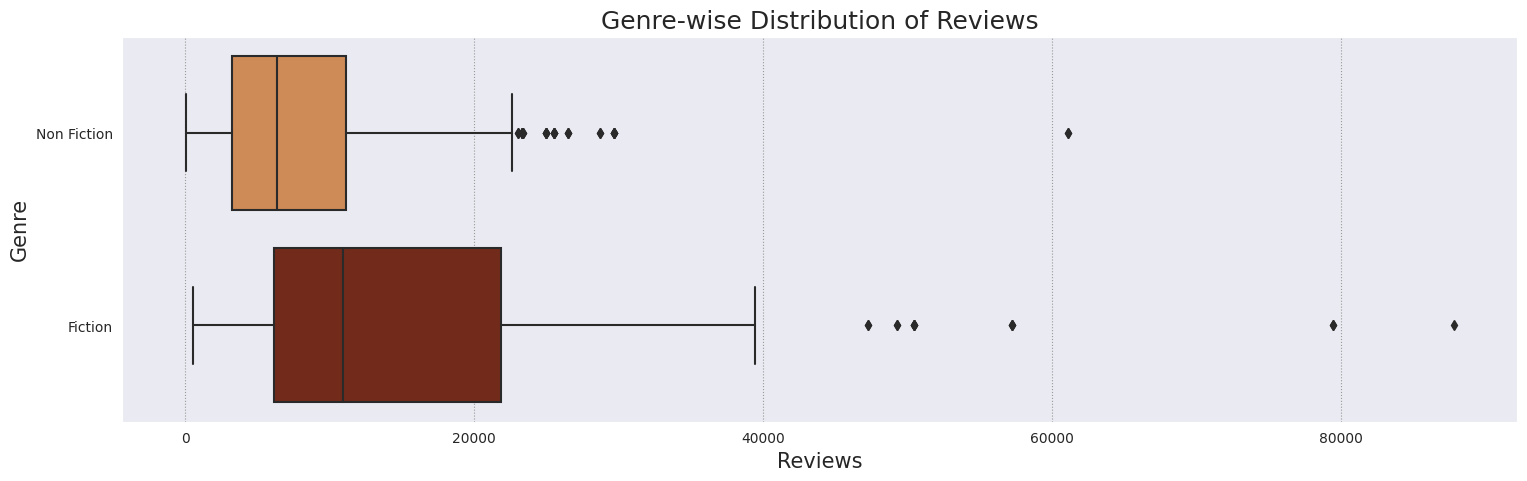

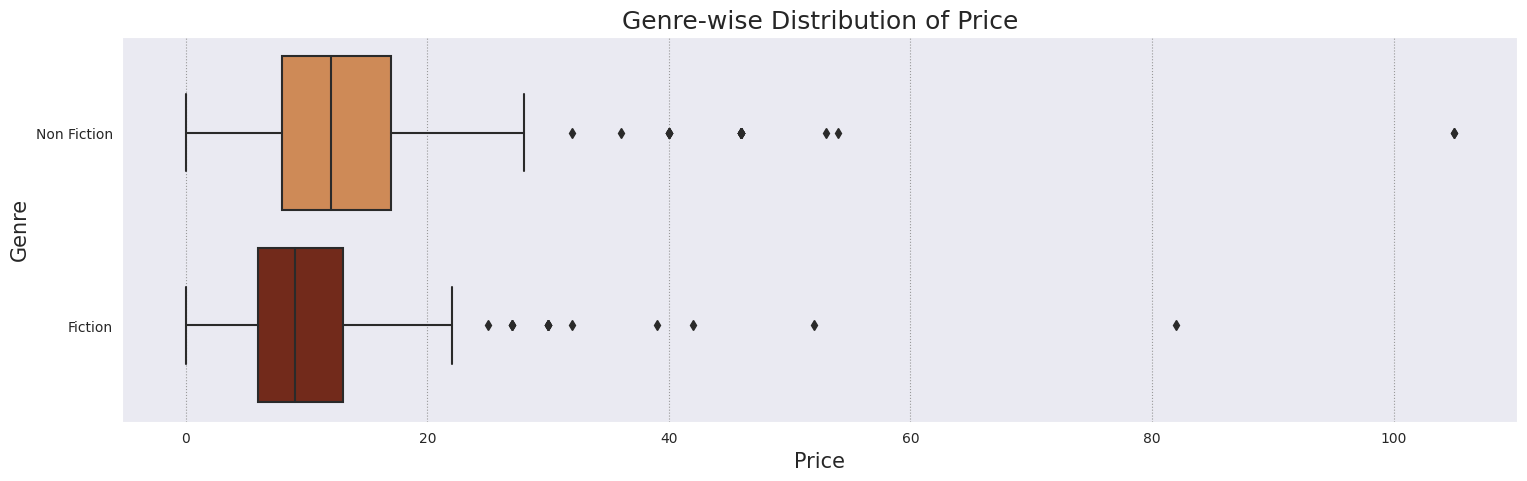

In [ ]:
#Genre Wise Distribution of Data
for col in df.columns[2:5]:
    plt.figure(figsize = (18,5))
    sns.boxplot(data =df,x = col,y ="Genre",palette=["#e28743","#81200c"])
    plt.title("Genre-wise Distribution of "+ col, fontsize = 18)
    plt.ylabel("Genre", fontsize = 15)
    plt.xlabel(col,fontsize = 15)
    plt.show()

In [ ]:
#Year wise + Genre Wise Distribution
df_fiction = df[(df["Genre"]== "Fiction")]
df_nonfict = df[(df["Genre"]!= "Fiction")]

<ipython-input-32-a88f821dccc6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)


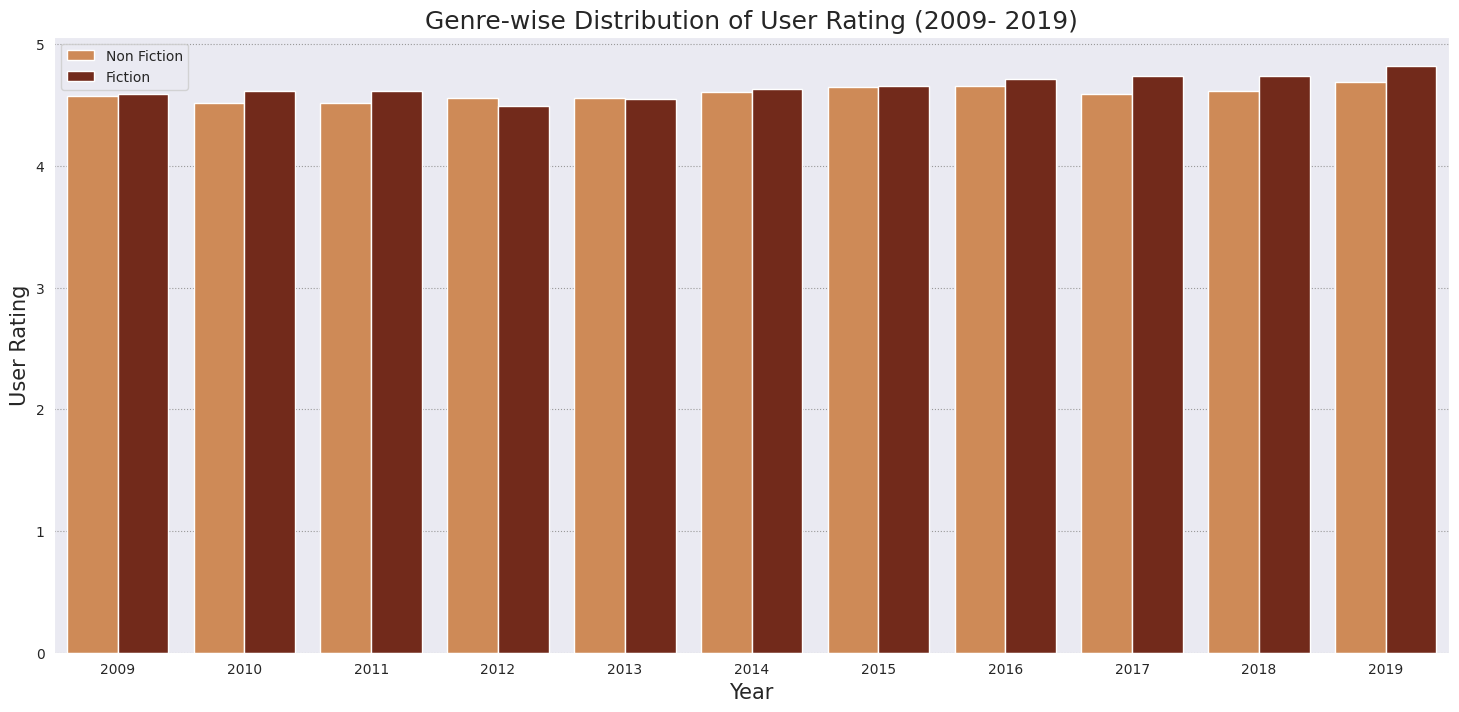

<ipython-input-32-a88f821dccc6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)


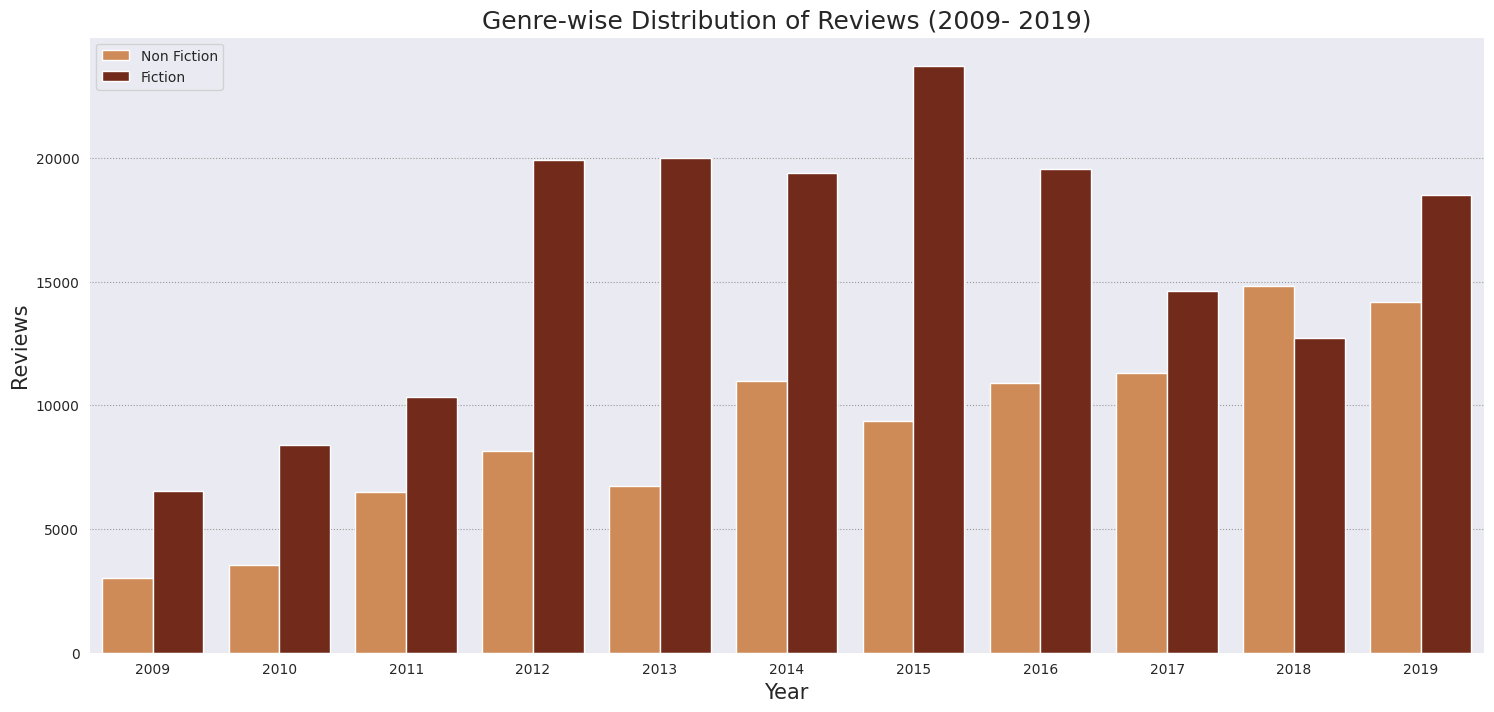

<ipython-input-32-a88f821dccc6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)


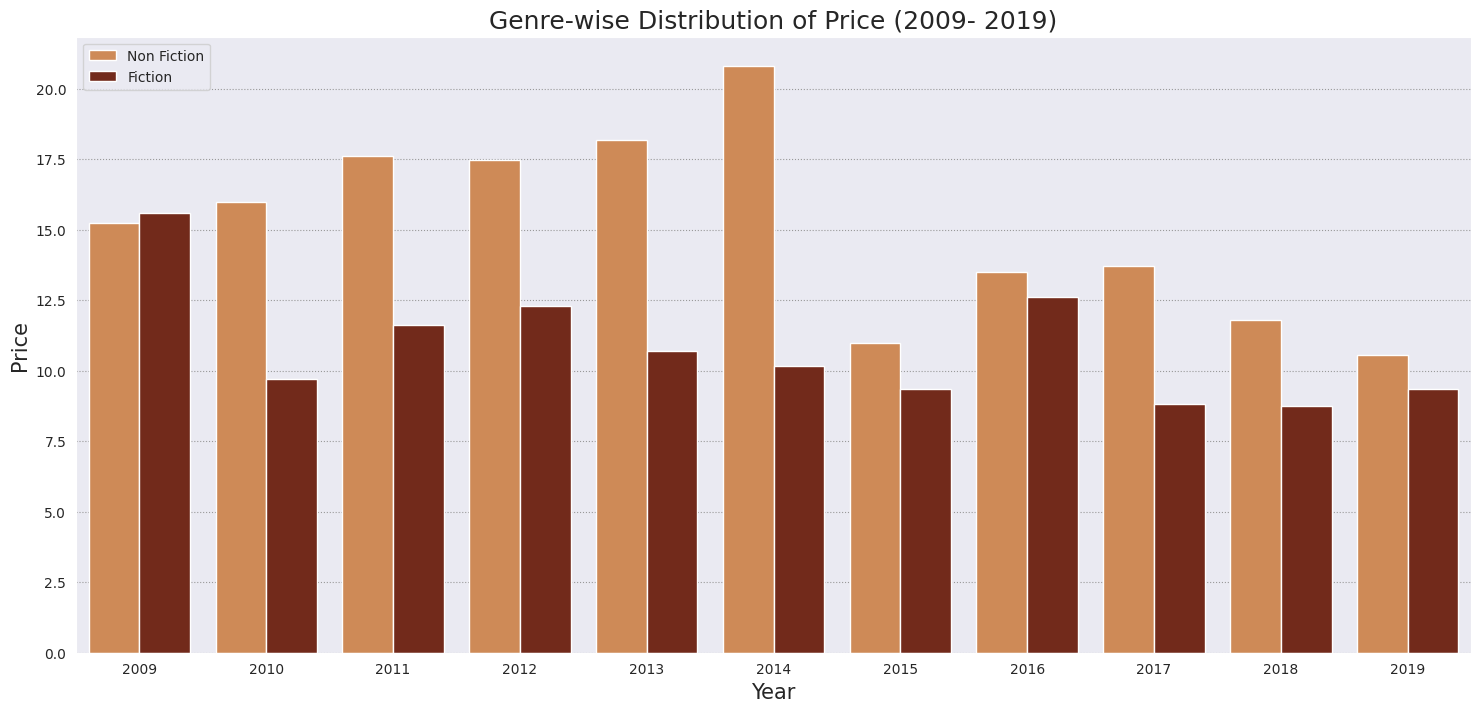

In [ ]:
for col in df.columns[2:5]:
    plt.figure(figsize = (18,8))
    sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)
    plt.legend(loc ="upper left")
    plt.title("Genre-wise Distribution of "+ col + " (2009- 2019)", fontsize = 18)
    plt.xlabel("Year", fontsize = 15)
    plt.ylabel(col,fontsize = 15)
    plt.show()

<ipython-input-33-a88f821dccc6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)


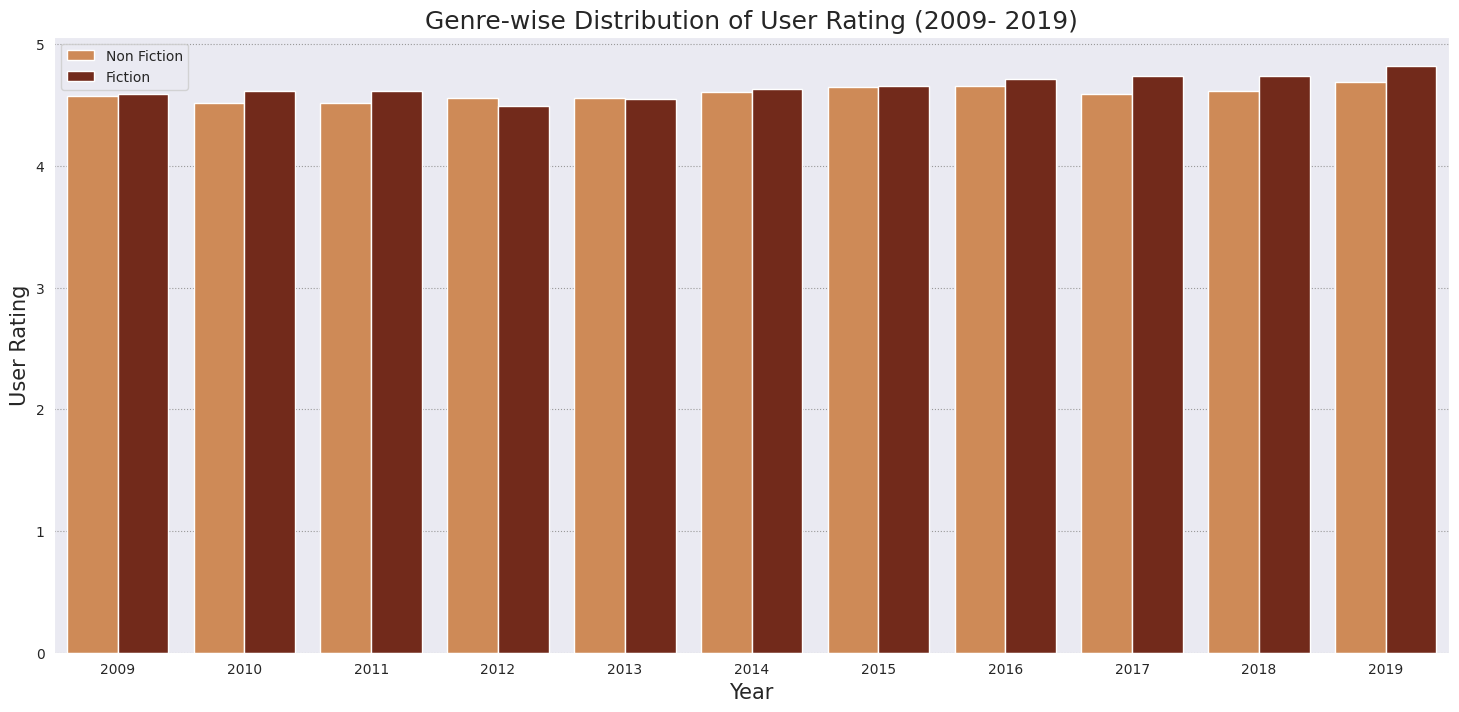

<ipython-input-33-a88f821dccc6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)


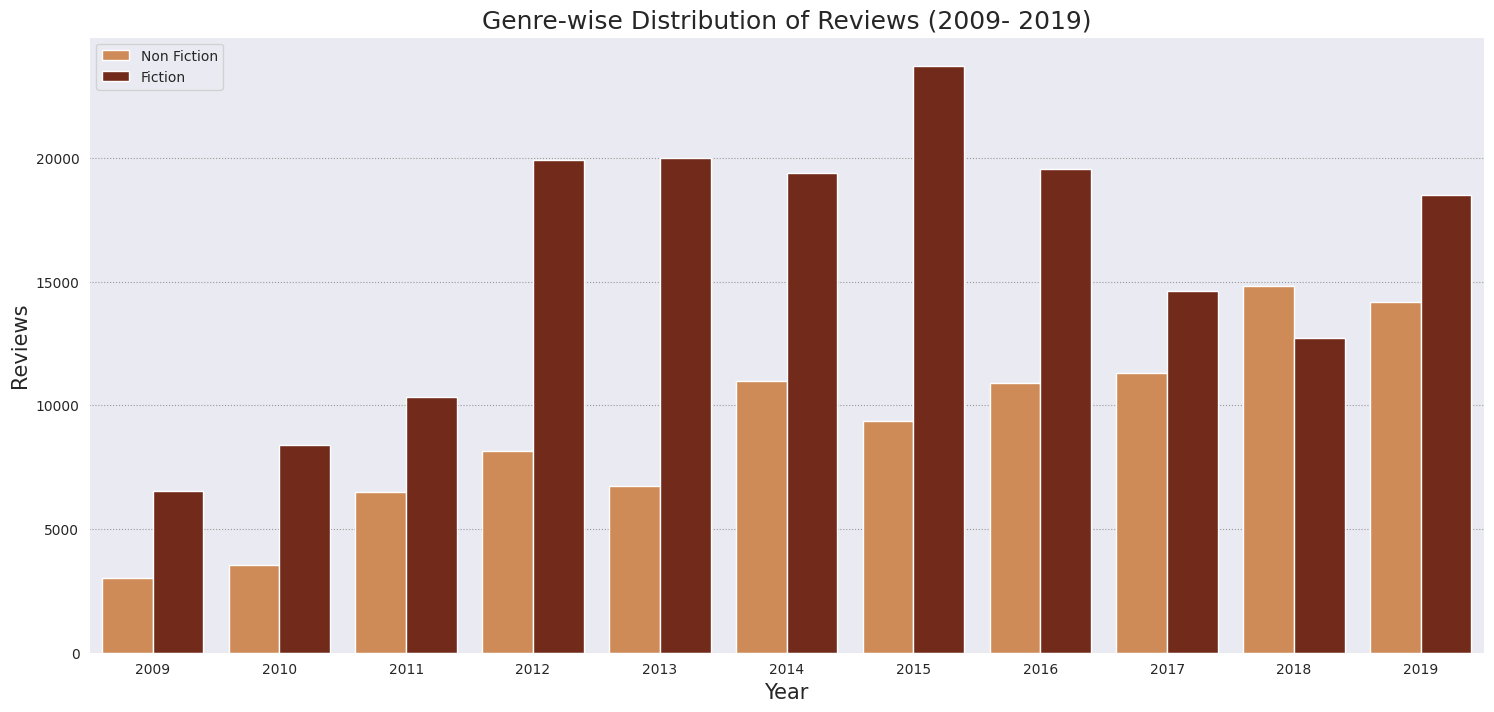

<ipython-input-33-a88f821dccc6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)


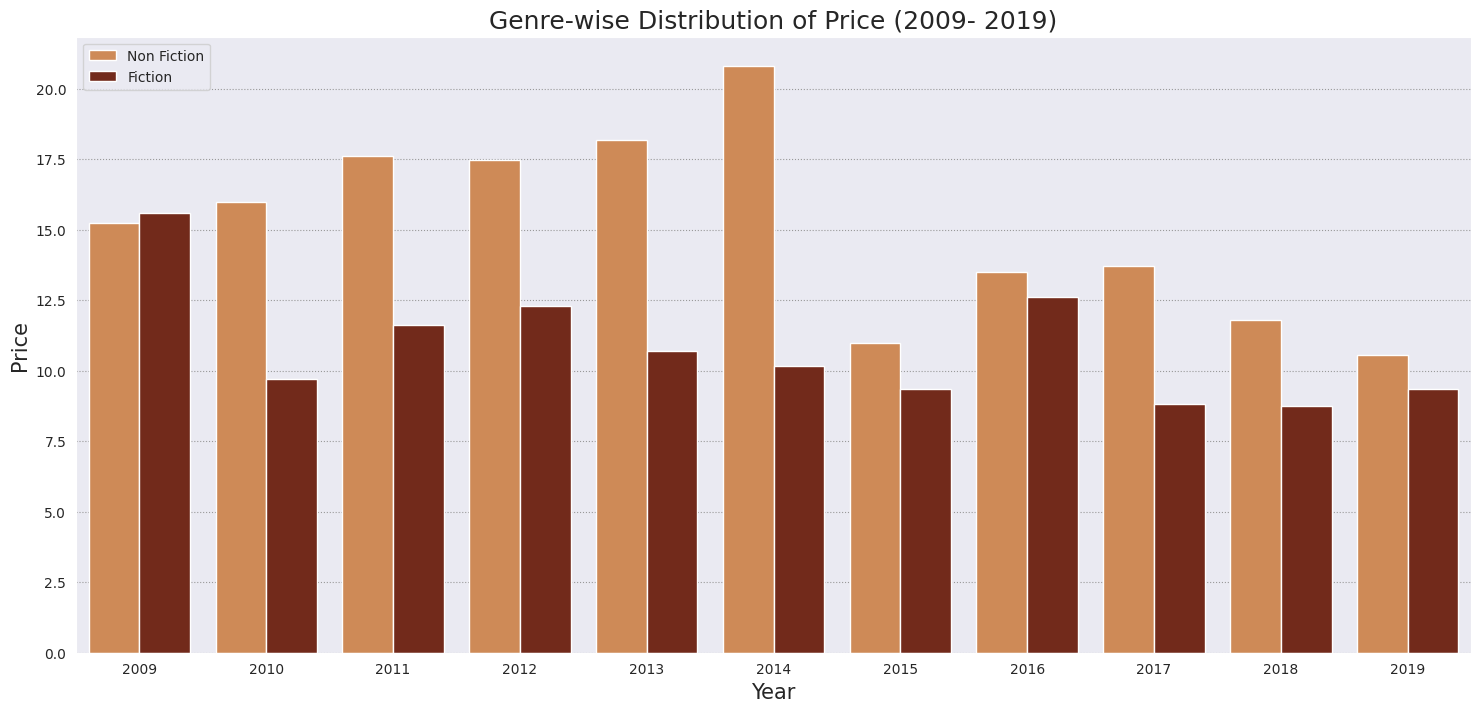

In [ ]:
for col in df.columns[2:5]:
    plt.figure(figsize = (18,8))
    sns.barplot(data =df,x = "Year",y = col,hue ="Genre",palette=["#e28743","#81200c"],ci =None)
    plt.legend(loc ="upper left")
    plt.title("Genre-wise Distribution of "+ col + " (2009- 2019)", fontsize = 18)
    plt.xlabel("Year", fontsize = 15)
    plt.ylabel(col,fontsize = 15)
    plt.show()

In [ ]:
print(df_nonfict["Price"].mean())
df_fiction["Price"].mean()

14.841935483870968


10.85

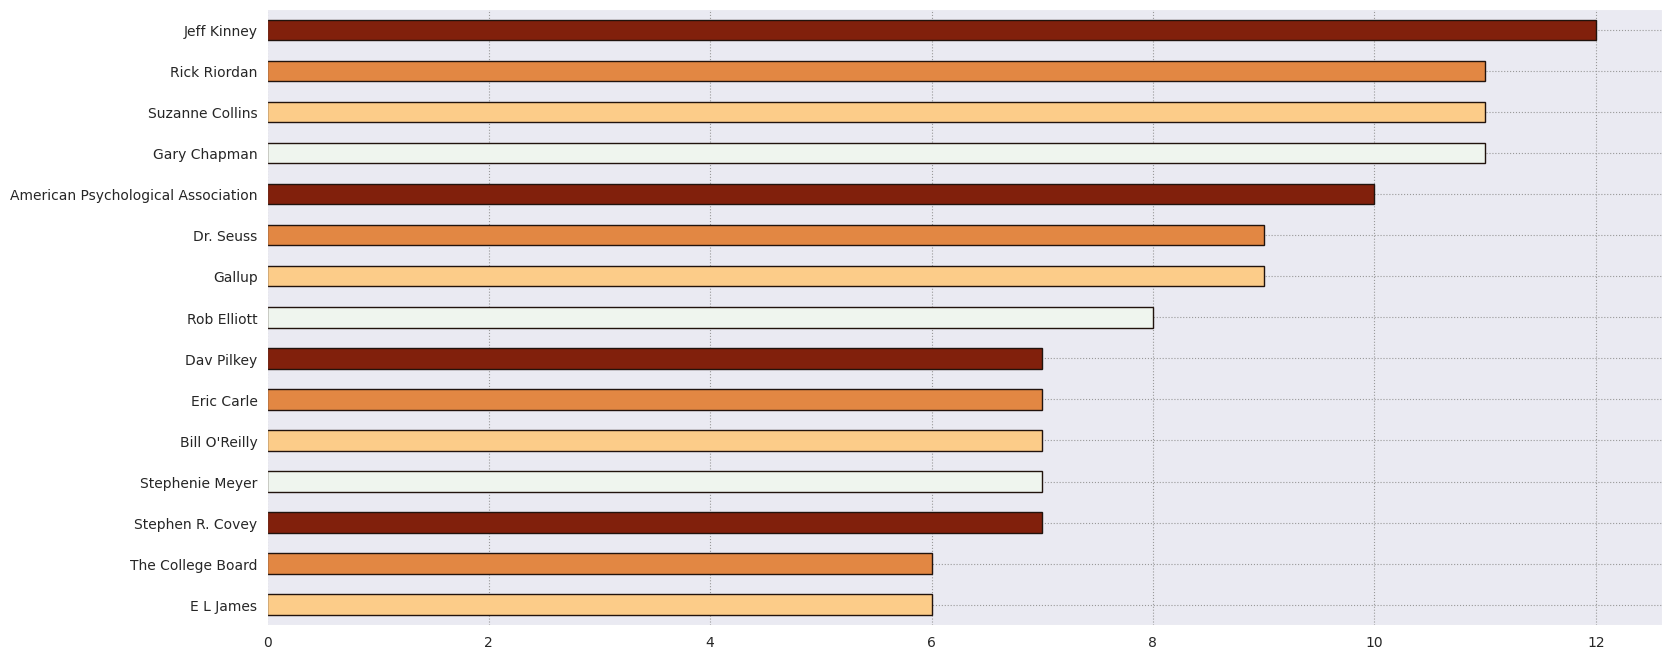

In [ ]:
#Who the top authors and What are their books?
df["Author"].value_counts().sort_values(ascending =False)[:15].plot(kind ="barh",color =["#81200c","#e28743","#fccc89","#eff5ee"],
                                                                 figsize = (18,8),edgecolor ="#21130d").invert_yaxis();

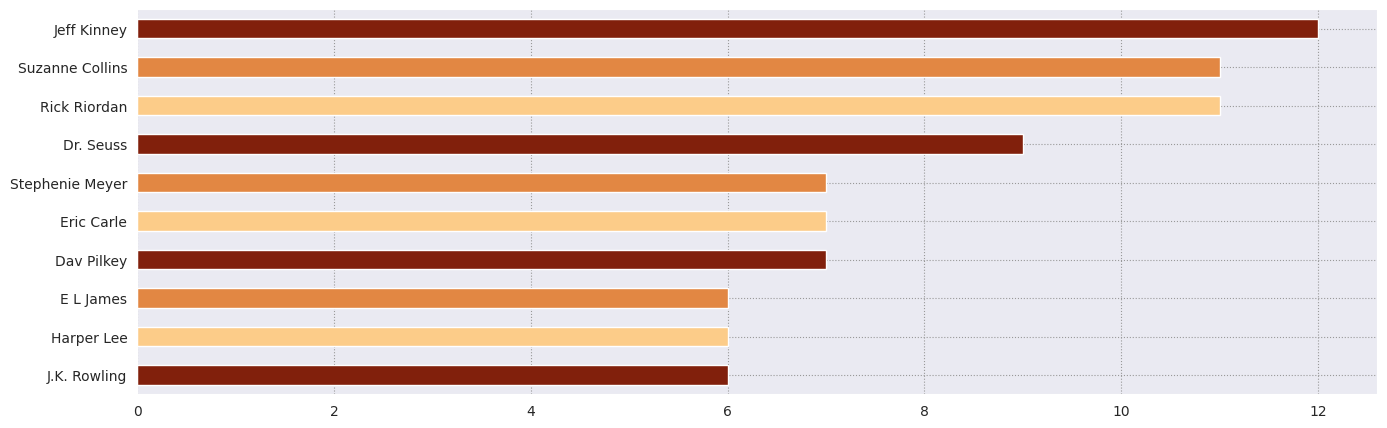

In [ ]:
#Top 10 Authors in Fiction Genre
df_fiction["Author"].value_counts()[:10].plot(kind= "barh",figsize =(16,5),color=["#81200c","#e28743","#fccc89"]).invert_yaxis();

In [ ]:
#Top 3 Fiction Authors and their Bestselling books
df_fiction[df_fiction["Author"].isin(["Jeff Kinney","Suzanne Collins","Rick Riordan"])][["Name","Author"]].sort_values(by="Author").drop_duplicates()


,Name,Author
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney
381,The Getaway,Jeff Kinney
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney


In [ ]:
#Top 10 Books in Fiction Genre
df_fiction.groupby(["Name","Author"])["Price"].count().sort_values(ascending = False)[:10]


Name                              Author               
Oh, the Places You'll Go!         Dr. Seuss                8
The Very Hungry Caterpillar       Eric Carle               7
Giraffes Can't Dance              Giles Andreae            5
Wonder                            R. J. Palacio            5
To Kill a Mockingbird             Harper Lee               5
The Help                          Kathryn Stockett         4
The Wonderful Things You Will Be  Emily Winfield Martin    4
The Fault in Our Stars            John Green               4
Dear Zoo: A Lift-the-Flap Book    Rod Campbell             4
Catching Fire (The Hunger Games)  Suzanne Collins          3
Name: Price, dtype: int64

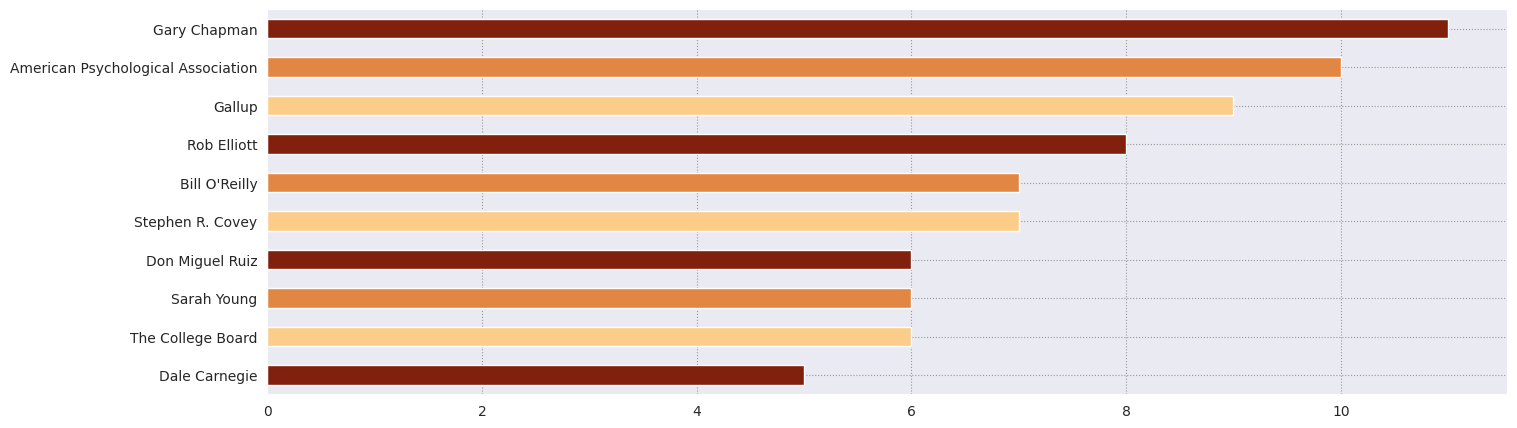

In [ ]:
#Top 10 Authors in Non-Fiction Genre
df_nonfict["Author"].value_counts()[:10].plot(kind= "barh",figsize =(16,5),color=["#81200c","#e28743","#fccc89"]).invert_yaxis();


In [ ]:
#Top 5 Non-fiction Authors and their Bestselling books
df_nonfict[df_nonfict["Author"].isin(["Gary Chapman","American Psychological Association","Gallup"
                                      ,"Rob Elliott","Bill O'Reilly"])][["Name","Author"]].sort_values(by="Author").drop_duplicates()


,Name,Author
278,Publication Manual of the American Psychologic...,American Psychological Association
196,Killing Jesus (Bill O'Reilly's Killing Series),Bill O'Reilly
202,Killing the Rising Sun: How America Vanquished...,Bill O'Reilly
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly
200,Killing Patton: The Strange Death of World War...,Bill O'Reilly
199,Killing Lincoln: The Shocking Assassination th...,Bill O'Reilly
197,Killing Kennedy: The End of Camelot,Bill O'Reilly
306,StrengthsFinder 2.0,Gallup
323,The 5 Love Languages: The Secret to Love That ...,Gary Chapman
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman


In [ ]:
#Top 10 Books in Non Fiction Genre
df_nonfict.groupby(["Name","Author"])["Price"].count().sort_values(ascending = False)[:10]

Name                                                                               Author                            
Publication Manual of the American Psychological Association, 6th Edition          American Psychological Association    10
StrengthsFinder 2.0                                                                Gallup                                 9
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change       Stephen R. Covey                       7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)          Sarah Young                            6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)  Don Miguel Ruiz                        6
The Five Dysfunctions of a Team: A Leadership Fable                                Patrick Lencioni                       5
The Official SAT Study Guide                                                       The College Board                      5
Laugh-Out-Loud